Creating a basic structure of the Feature + Network Based Heirarchial Tree


- Living Organisms (Features: {'reproduce', 'eat', 'breathe'})
  - Animals (Features: {'have bones', 'walk', 'have skin'})
    - Mammals (Features: {'hair', 'no-eggs', 'lactate'})
    - Insects (Features: {'multi-lings', 'eggs', 'fly', 'exoskeleton'})
    - Birds (Features: {'feathers', 'fly', 'eggs', 'beaks'})
  - Plants (Features: {'roots', 'leaves', 'photosynthesis'})
    - Flowers (Features: {'fragrance', 'petals', 'shrub'})
    - Microbial (Features: {'naive-structure', 'small'})
    - Trees (Features: {'shed', 'wood', 'large', 'bark'})



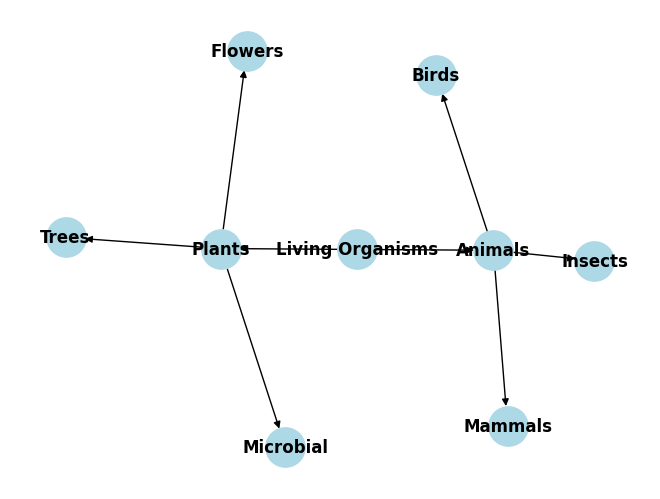

In [116]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()
global obs
obs = []

class Node:
    level = 0

    def __init__(self, name, features=None):
        self.name = name
        self.features = features if features else {}
        self.children = []
        G.add_node(self.name)

    def add_child(self, child_node):
        self.children.append(child_node)

    def setParent(self,Parent):
        self.level = Parent.level + 1
        self.parent = Parent
        G.add_edge(self.parent.name,self.name)
        self.parent.add_child(self)
        if self.level > len(obs):
            obs.append([self])
        else:
            obs[self.level-1].append(self)    

    def __str__(self, level=0):
        indent = " " * (level * 2)
        node_str = f"{indent}- {self.name}"
        if self.features:
            node_str += f" (Features: {self.features})"
        node_str += "\n"
        for child in self.children:
            node_str += child.__str__(level + 1)
        return node_str


root = Node("Living Organisms", {"eat", "reproduce", "breathe"})
child1 = Node("Animals", {"walk","have skin", "have bones"})
child2 = Node("Plants", {"photosynthesis", "roots", "leaves"})
subchild1 = Node("Mammals", {"hair", "lactate", "no-eggs"})
subchild2 = Node("Insects", {"exoskeleton", "fly", "multi-lings", "eggs"})
subchild3 = Node("Birds", {"fly", "beaks", "feathers", "eggs"})
subchild4 = Node("Flowers", {"petals", "fragrance", "shrub"})
subchild5 = Node("Microbial", {"small", "naive-structure"})
subchild6 = Node("Trees", {"large","bark","shed","wood"})

child1.setParent(root)
child2.setParent(root)
subchild1.setParent(child1)
subchild2.setParent(child1)
subchild3.setParent(child1)
subchild4.setParent(child2)
subchild5.setParent(child2)
subchild6.setParent(child2)


print(root)
nx.draw(G, with_labels=True, node_color='lightblue', font_weight='bold', node_size=800)
plt.show()

Applying Natural Language Processing To Create List of Word Features
(BAG OF WORDS MODEL)

In [117]:
import numpy as np
import pandas as pd

In [118]:
dataset = pd.read_csv('data.csv')
dataset

,BANYAN,ROSE,DOG,EAGLE,BUTTERFLY,Unnamed: 5
0,Large Tree,"""Pink Petals""","""eats food""","""walks for food""","""typical exoskeleton""",NaN
1,Strong Bark,"""Photosynthesis in daytime""","""breathes rapidly""","""flies high""","""fly all around""",NaN
2,Multiple Barks,"""Awesome Fragrance""","""reproduces pups""","""big beak""","""breathes flower air""",NaN
3,Hanging Roots,"""Red Petals""","""has hair""","""superior feathers""","""produces eggs""",NaN
4,Big Leaves,"""Leaves are Pointy""","""walks daily""","""reproduces by eggs""","""has multi-lings""",NaN
5,Spreads Big,"""Thorns""","""Licks when happy""","""breathes through beak""","""bones make up exoskeleton""",NaN
6,Provides Shed,"""Is a shrub""","""Eats full time""","""eats non-veg""","""reproduce frequently""",NaN
7,Cannot Move,"""performs Photosynthesis""","""hair is fluffy""","""Territorial Birds""","""Eat flower nectar""",NaN
8,Large Roots,"""found in gardens""","""loves bones""","""skin belo feathers""","""Beautiful""",NaN
9,Strong wood,"""Low maintenance""","""best companion""","""have hollow bones""","""walks sometimes""",NaN


In [119]:
item = 'BUTTERFLY'

In [120]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
corpus = []
for i in range(0, 9):
  review = re.sub('[^a-zA-Z]', ' ', dataset[item][i])
  review = review.lower()
  review = review.split()
  print(review)
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [word for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)


['typical', 'exoskeleton']
['fly', 'all', 'around']
['breathes', 'flower', 'air']
['produces', 'eggs']
['has', 'multi', 'lings']
['bones', 'make', 'up', 'exoskeleton']
['reproduce', 'frequently']
['eat', 'flower', 'nectar']
['beautiful']


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [121]:
print(corpus)

['typical exoskeleton', 'fly around', 'breathes flower air', 'produces eggs', 'multi lings', 'bones make exoskeleton', 'reproduce frequently', 'eat flower nectar', 'beautiful']


Bag Of Features

In [122]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus)
feat_inp = cv.get_feature_names_out()
print(feat_inp)

['air' 'around' 'beautiful' 'bones' 'breathes' 'eat' 'eggs' 'exoskeleton'
 'flower' 'fly' 'frequently' 'lings' 'make' 'multi' 'nectar' 'produces'
 'reproduce' 'typical']


Checking Relation in leaf nodes(Bottom-to-Up Approach)
Also Applying Probabilistic Approach

[0, 3, 2, 0, 0, 0]
[0.0, 0.6, 0.4, 0.0, 0.0, 0.0]
0.6
1
- Living Organisms (Features: {'reproduce', 'eat', 'breathe'})
  - Animals (Features: {'have bones', 'walk', 'have skin'})
    - Mammals (Features: {'hair', 'no-eggs', 'lactate'})
    - Insects (Features: {'multi-lings', 'eggs', 'fly', 'exoskeleton'})
      - BUTTERFLY (Features: {'around', 'air', 'beautiful', 'eat', 'flower', 'frequently', 'lings', 'typical', 'make', 'bones', 'exoskeleton', 'produces', 'eggs', 'breathes', 'nectar', 'multi', 'reproduce', 'fly'})
    - Birds (Features: {'feathers', 'fly', 'eggs', 'beaks'})
  - Plants (Features: {'roots', 'leaves', 'photosynthesis'})
    - Flowers (Features: {'fragrance', 'petals', 'shrub'})
    - Microbial (Features: {'naive-structure', 'small'})
    - Trees (Features: {'shed', 'wood', 'large', 'bark'})



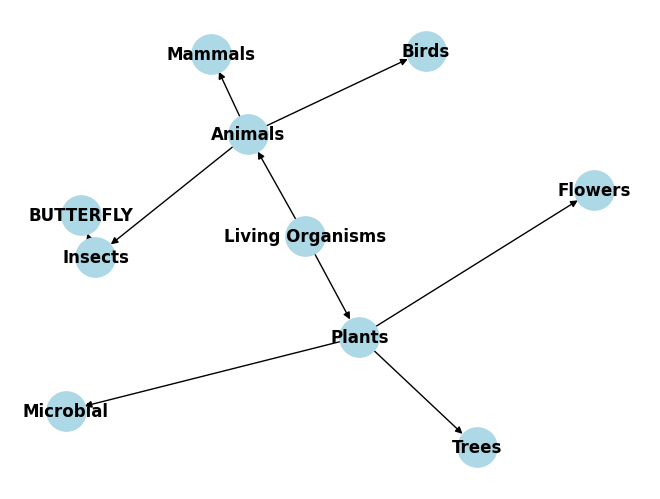

In [123]:

threshold = 0.6
# index_class = 0
current_level = len(obs)

for level in range(current_level,0,-1):
    features_obs = []
    for element in obs[level-1] :
        no_feature_matched = 0
        for feature in element.features:
            if feature in feat_inp:
                no_feature_matched += 1
        features_obs.append(no_feature_matched)
    print(features_obs)      
    probability_matrix =[feature/sum(features_obs) for feature in features_obs]     
    print(probability_matrix)

    a = max(probability_matrix)

    if (a >= threshold):
        print(a)
        index_class = probability_matrix.index(a)
        print(index_class)
        node = Node(item,{feat for feat in feat_inp})
        node.setParent(obs[level-1][index_class])
        break

    else:
        continue    

print(root)    
nx.draw(G, with_labels=True, node_color='lightblue', font_weight='bold', node_size=800)
plt.show()



